(-0.5, 511.5, 511.5, -0.5)

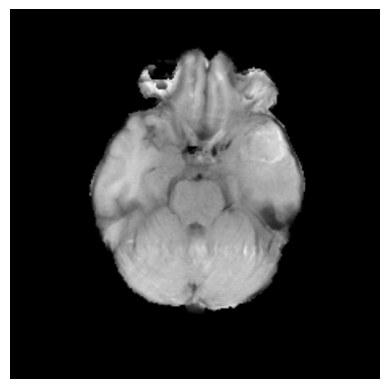

In [20]:
import pydicom
import matplotlib.pyplot as plt

# DICOM 파일 경로 설정
dicom_file_path = '/home/jiwoo/문서/brats_data/test/00001/T1w/Image-13.dcm'
# DICOM 파일 읽기
dicom_data = pydicom.dcmread(dicom_file_path)

img_data = dicom_data.pixel_array
plt.imshow(img_data, cmap='gray')
plt.axis('off')

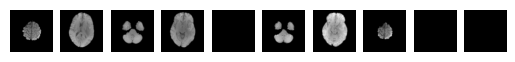

In [23]:
import os
import pydicom
import matplotlib.pyplot as plt

def read_brats_dcm_images(folder_path):
    images = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dcm"):
                file_path = os.path.join(root, file)
                dicom_data = pydicom.dcmread(file_path)
                image = dicom_data.pixel_array
                images.append(image)
    
    return images[:10]

def display_images(images):
    for i, image in enumerate(images, 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap="gray")
        plt.axis("off")

    plt.show()

# BRATS 데이터셋 폴더 경로 설정
brats_folder_path = '/home/jiwoo/문서/brats_data/test/00001/T1w/'

# DICOM 이미지 읽기
brats_images = read_brats_dcm_images(brats_folder_path)

# DICOM 이미지 시각화
display_images(brats_images)